In [1]:
import pandas as pd

In [2]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()


[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [6]:
#  3. Convert the June temperatures to a list.
June = []
June = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
print(June)


[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(June)
df.rename(columns={"tobs":"June Temps"},inplace=True)
df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()


,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()


[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [10]:
# 7. Convert the December temperatures to a list.
December = []
December = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
print(December)


[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(December)
df.rename(columns={"tobs":"December Temps"},inplace=True)
df


,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()


,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Summary: Two Additional Queries for June and December.

In [13]:
#JUNE PRECIPITATION 2010-2017
session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()


[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [14]:
June_rain = []
June_rain = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
print(June_rain)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [15]:
df = pd.DataFrame(June_rain)
df.rename(columns={"prcp":"June Precipitation"},inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['June Precipitation'] = df['June Precipitation'].fillna(0)
df

,date,June Precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [16]:
df.describe()

,June Precipitation
count,1700.000000
mean,0.126253
std,0.325012
min,0.000000
25%,0.000000
50%,0.010000
75%,0.100000
max,4.430000


In [17]:
df.count()

date                  1700
June Precipitation    1700
dtype: int64

In [18]:
df.isnull().sum()

date                  0
June Precipitation    0
dtype: int64

In [19]:
year=df.groupby(df['date'].dt.year).mean()["June Precipitation"]

rain_summary_df = pd.DataFrame(year)
rain_summary_df.index.name = 'Year'
rain_summary_df

,June Precipitation
Year,
2010,0.040496
2011,0.224273
2012,0.089242
2013,0.136221
2014,0.115116
2015,0.115911
2016,0.189330
2017,0.107435


In [20]:
# Establish the precipitation bins and group names.
precipitation_bins = [0, 0.10, 0.30, 0.45]
rain_classification = ["Light (<0.10)", "Moderate (0.11-0.30)", "Heavy (>0.30)"]

# Categorize precipitation based on the bins.
rain_summary_df["Rain"]= pd.cut(rain_summary_df["June Precipitation"], precipitation_bins, labels=rain_classification)
rain_summary_df

,June Precipitation,Rain
Year,,
2010,0.040496,Light (<0.10)
2011,0.224273,Moderate (0.11-0.30)
2012,0.089242,Light (<0.10)
2013,0.136221,Moderate (0.11-0.30)
2014,0.115116,Moderate (0.11-0.30)
2015,0.115911,Moderate (0.11-0.30)
2016,0.189330,Moderate (0.11-0.30)
2017,0.107435,Moderate (0.11-0.30)


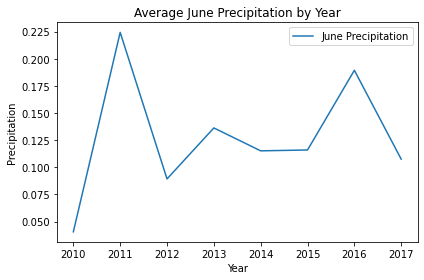

In [21]:
import matplotlib.pyplot as plt

rain_summary_df.plot()
plt.title("Average June Precipitation by Year")
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.tight_layout()
plt.savefig("Images/June_precipitation_graphsummary.png")

In [22]:
#DECEMBER PRECIPITATION 2010-2016
session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [23]:
December_rain = []
December_rain = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
print(December_rain)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [24]:
df = pd.DataFrame(December_rain)
df.rename(columns={"prcp":"December Precipitation"},inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['December Precipitation'] = df['December Precipitation'].fillna(0)
df

,date,December Precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [25]:
df.describe()

,December Precipitation
count,1517.000000
mean,0.200811
std,0.524095
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.420000


In [26]:
df.count()

date                      1517
December Precipitation    1517
dtype: int64

In [27]:
df.isnull().sum()

date                      0
December Precipitation    0
dtype: int64

In [28]:
year=df.groupby(df['date'].dt.year).mean()["December Precipitation"]

Dec_rain_summary_df = pd.DataFrame(year)
Dec_rain_summary_df.index.name = 'Year'
Dec_rain_summary_df

,December Precipitation
Year,
2010,0.449319
2011,0.194350
2012,0.083028
2013,0.153846
2014,0.173229
2015,0.149239
2016,0.177550


In [29]:
# Establish the precipitation bins and group names.
precipitation_bins = [0, 0.10, 0.30, 0.45]
rain_classification = ["Light (<0.10)", "Moderate (0.11-0.30)", "Heavy (>0.30)"]

# Categorize precipitation based on the bins.
Dec_rain_summary_df["Rain"]= pd.cut(Dec_rain_summary_df["December Precipitation"], precipitation_bins, labels=rain_classification)
Dec_rain_summary_df

,December Precipitation,Rain
Year,,
2010,0.449319,Heavy (>0.30)
2011,0.194350,Moderate (0.11-0.30)
2012,0.083028,Light (<0.10)
2013,0.153846,Moderate (0.11-0.30)
2014,0.173229,Moderate (0.11-0.30)
2015,0.149239,Moderate (0.11-0.30)
2016,0.177550,Moderate (0.11-0.30)


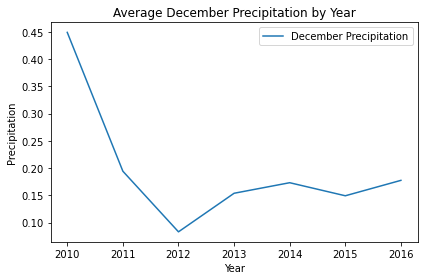

In [30]:
import matplotlib.pyplot as plt

Dec_rain_summary_df.plot()
plt.title("Average December Precipitation by Year")
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.tight_layout()
plt.savefig("Images/December_precipitation_graphsummary.png")